In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
files = []
for i in range(29):
    tempdf = pd.read_csv(f'data/User{i+1}.csv', delimiter = ',')
    tempdf['User'] = i
    files.append(tempdf)
df = pd.concat(files, ignore_index = True)

In [3]:
df

,Game Completed Date,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Imposter Kills,Game Length,Ejected,Sabotages Fixed,Time to complete all tasks,Rank Change,Region/Game Code,User
0,12/13/2020 at 1:26:56 am EST,Crewmate,Win,3,No,Yes,-,07m 04s,No,2.0,-,++,NA / WYMSBF,0
1,12/13/2020 at 1:17:42 am EST,Crewmate,Loss,7,Yes,No,-,16m 21s,No,1.0,09m 48s,--,NA / WYMSBF,0
2,12/13/2020 at 12:57:47 am EST,Crewmate,Win,3,No,No,-,11m 33s,No,0.0,-,++,NA / WYMSBF,0
3,12/13/2020 at 12:41:55 am EST,Imposter,Win,-,-,-,2,08m 05s,No,NaN,-,+++,Europe / QIRTNF,0
4,12/13/2020 at 12:30:37 am EST,Crewmate,Loss,4,No,No,-,05m 10s,No,0.0,-,---,Europe / QIRTNF,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,12/01/2020 at 11:07:41 am EST,Imposter,Loss,-,-,-,2,14m 10s,No,NaN,-,-,NA / SNNGZF,28
2223,12/01/2020 at 10:52:25 am EST,Crewmate,Win,7,Yes,No,-,14m 11s,No,1.0,14m 10s,++,NA / SNNGZF,28
2224,11/26/2020 at 11:23:14 am EST,Crewmate,Win,7,Yes,No,-,19m 45s,No,1.0,15m 16s,++,Europe / NZWLXQ,28
2225,11/26/2020 at 11:00:36 am EST,Crewmate,Win,7,Yes,No,-,10m 18s,No,0.0,06m 13s,++,Europe / NZWLXQ,28


In [4]:
df.dtypes

Game Completed Date            object
Team                           object
Outcome                        object
Task Completed                 object
All Tasks Completed            object
Murdered                       object
Imposter Kills                 object
Game Length                    object
Ejected                        object
Sabotages Fixed               float64
Time to complete all tasks     object
Rank Change                    object
Region/Game Code               object
User                            int64
dtype: object

In [5]:
df[['Task Completed', 'Imposter Kills']] = df[['Task Completed', 'Imposter Kills']].apply(pd.to_numeric, errors = 'coerce')

In [6]:
df['Region'] = df['Region/Game Code'].str.extract(r'^(.*?)/')
df['Region'].value_counts()


NA         1436
Europe      791
Name: Region, dtype: int64

In [7]:
df['Game Length'] = df['Game Length'].apply(pd.to_timedelta)
df['Game Length'] = df['Game Length'] / np.timedelta64(1, 's')

In [8]:
df['Time to complete all tasks'] = df['Time to complete all tasks'].apply(pd.to_timedelta, errors = 'coerce')
df['Time to complete all tasks'] = df['Time to complete all tasks'] / np.timedelta64(1, 's')

In [9]:
crewmate = df[['Team',
               'Outcome',
               'Task Completed',
               'All Tasks Completed',
               'Murdered',
               'Game Length',
               'Ejected',
              'Sabotages Fixed',
              'Region',
              'User']][df['Team'] == 'Crewmate']
crewmate.head()

,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Game Length,Ejected,Sabotages Fixed,Region,User
0,Crewmate,Win,3.0,No,Yes,424.0,No,2.0,NA,0
1,Crewmate,Loss,7.0,Yes,No,981.0,No,1.0,NA,0
2,Crewmate,Win,3.0,No,No,693.0,No,0.0,NA,0
4,Crewmate,Loss,4.0,No,No,310.0,No,0.0,Europe,0
5,Crewmate,Loss,7.0,Yes,Yes,982.0,No,0.0,Europe,0


In [10]:
crewmate['Outcome'] = crewmate['Outcome'].replace(['Loss', 'Win'],[0, 1])
crewmate['All Tasks Completed'] = crewmate['All Tasks Completed'].replace(['No', 'Yes'],[0, 1])
crewmate['Murdered'] = crewmate['Murdered'].replace(['No', 'Yes'],[0, 1])
crewmate['Ejected'] = crewmate['Ejected'].replace(['No', 'Yes'],[0, 1])
crewmate['Region'] = crewmate['Region'].replace(['NA ', 'Europe '],[0, 1])
crewmate.head()

,Team,Outcome,Task Completed,All Tasks Completed,Murdered,Game Length,Ejected,Sabotages Fixed,Region,User
0,Crewmate,1,3.0,0,1,424.0,0,2.0,0,0
1,Crewmate,0,7.0,1,0,981.0,0,1.0,0,0
2,Crewmate,1,3.0,0,0,693.0,0,0.0,0,0
4,Crewmate,0,4.0,0,0,310.0,0,0.0,1,0
5,Crewmate,0,7.0,1,1,982.0,0,0.0,1,0


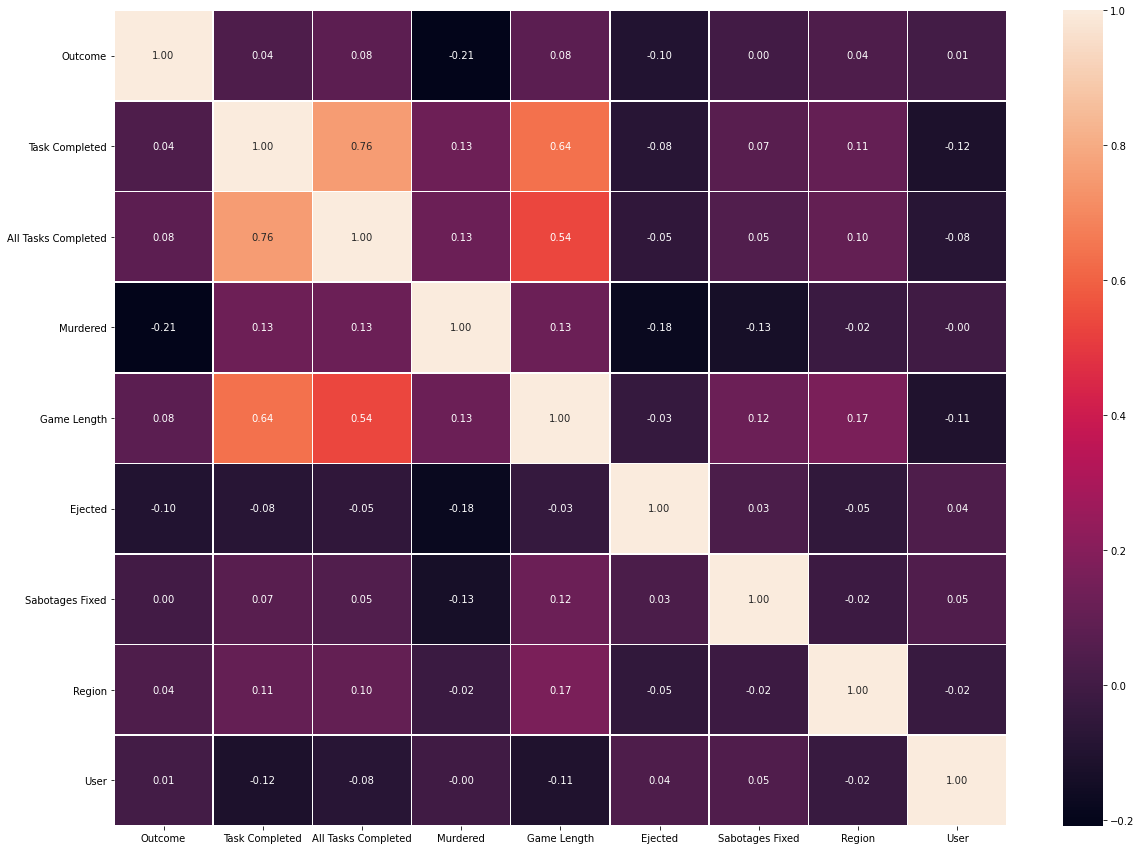

In [11]:
%matplotlib inline
corrlation_matrix = crewmate.corr()
fig, ax = plt.subplots(figsize = (20, 15))
ax = sns.heatmap(corrlation_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f")

In [12]:
crewmate = crewmate.drop(['All Tasks Completed'], axis =1)

In [13]:
crewmate.head()

,Team,Outcome,Task Completed,Murdered,Game Length,Ejected,Sabotages Fixed,Region,User
0,Crewmate,1,3.0,1,424.0,0,2.0,0,0
1,Crewmate,0,7.0,0,981.0,0,1.0,0,0
2,Crewmate,1,3.0,0,693.0,0,0.0,0,0
4,Crewmate,0,4.0,0,310.0,0,0.0,1,0
5,Crewmate,0,7.0,1,982.0,0,0.0,1,0


In [14]:
def user_train_valid_split(users_i,valid_ratio,possible=False):
    n = sum(users_i)
    target = int(np.floor(valid_ratio*n))
    while not possible:
        possible, validation_indices = user_split(users_i,target)
        target -= 1
    training_indices = [i for i in range(len(users_i)) if i not in validation_indices]
    return training_indices, validation_indices

def user_split(users_i,target):  
    # Reference: https://levelup.gitconnected.com/dynamic-programming-subset-sum-c386126621cd
    n = len(users_i)
    solution = [[False for j in range(int(target+1))] for i in range(n+1)]
    # base cases
    for i in range(n):
        solution[i][0] = True
    # other cases
    for i in range(1,n+1):
        for j in range(1,target+1):
            solution[i][j] = solution[i-1][j]
            if(solution[i][j] == False and j >= users_i[i-1]):
                solution[i][j] = solution[i][j] or solution[i-1][j-users_i[i-1]]
    # check if the subset sum is possible
    possible = solution[len(users_i)][target]
    subset = []
    if not possible: return possible, subset
    # return the subset solution if one exists
    y = len(users_i)
    x = target
    while x != 0:
        if solution[y-1][x] == False:
            subset.append(y-1)
            x -= users_i[y-1]
        else: 
            y -= 1
    return possible, subset

In [15]:
crewmates_i = list(crewmate["User"].value_counts(sort = False))
test_ratio = .25
training_indices, test_indices = user_train_valid_split(crewmates_i,test_ratio)

#check
train_sum = sum([crewmates_i[i] for i in training_indices])
test_sum = sum([crewmates_i[i] for i in test_indices])
print("expected valid ratio: {}, actual: {}".format(test_ratio, test_sum/(train_sum+test_sum)))

train_data = crewmate.loc[crewmate['User'].isin(training_indices)]
test_data = crewmate.loc[crewmate['User'].isin(test_indices)]
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

expected valid ratio: 0.25, actual: 0.2498580352072686


In [16]:
train_data

,Team,Outcome,Task Completed,Murdered,Game Length,Ejected,Sabotages Fixed,Region,User
0,Crewmate,1,3.0,1,424.0,0,2.0,0,0
1,Crewmate,0,7.0,0,981.0,0,1.0,0,0
2,Crewmate,1,3.0,0,693.0,0,0.0,0,0
3,Crewmate,0,4.0,0,310.0,0,0.0,1,0
4,Crewmate,0,7.0,1,982.0,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...
1316,Crewmate,0,5.0,0,660.0,1,2.0,1,28
1317,Crewmate,1,7.0,0,851.0,0,1.0,0,28
1318,Crewmate,1,7.0,0,1185.0,0,1.0,1,28
1319,Crewmate,1,7.0,0,618.0,0,0.0,1,28


### Hypothesis Testing

In [17]:
from scipy import stats

avg_task_completed = crewmate.groupby(by = 'User')['Task Completed'].mean()
avg_wins = crewmate.groupby(by = 'User')['Outcome'].mean()

thresh = avg_task_completed.mean()
less_tasks = avg_wins[avg_task_completed < thresh]
greater_tasks = avg_wins[avg_task_completed >= thresh]
avg_task_completed = crewmate.groupby(by = 'User')['Task Completed'].mean()
avg_wins = crewmate.groupby(by = 'User')['Outcome'].mean()
thresh = avg_task_completed.mean()
less_tasks = avg_wins[avg_task_completed < thresh]
greater_tasks = avg_wins[avg_task_completed >= thresh]

t1, p1 = stats.ttest_ind(less_tasks, greater_tasks, alternative = 'less')
print(p1)
print(t1)

0.05237999155491819
-1.6786449499637606


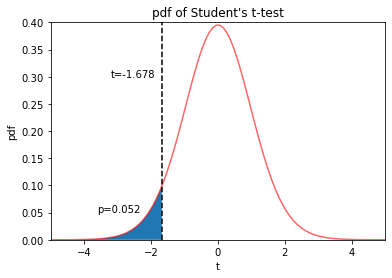

In [18]:
from scipy.stats import t
degree = 27
fig = plt.figure()
x = np.linspace(t.ppf(0.00001, degree),
                t.ppf(0.99999, degree), 100)
plt.plot(x, t.pdf(x, degree),'r-', alpha=0.6, label='t pdf')
plt.axvline(t1, color = 'black', ls = '--')
plt.xlabel('t')
plt.ylabel('pdf')
plt.title("pdf of Student's t-test")
plt.xlim(-5,5)
plt.ylim(0,.4)

def f(x):
    return t.pdf(x, 27)

section = np.linspace(-5,t1,100)
plt.fill_between(section,f(section))
plt.annotate('t=-1.678', (-3.2,.3))
plt.annotate('p=0.052', (-3.6,.05))

plt.show()

### Logistic Regression

<BarContainer object of 6 artists>

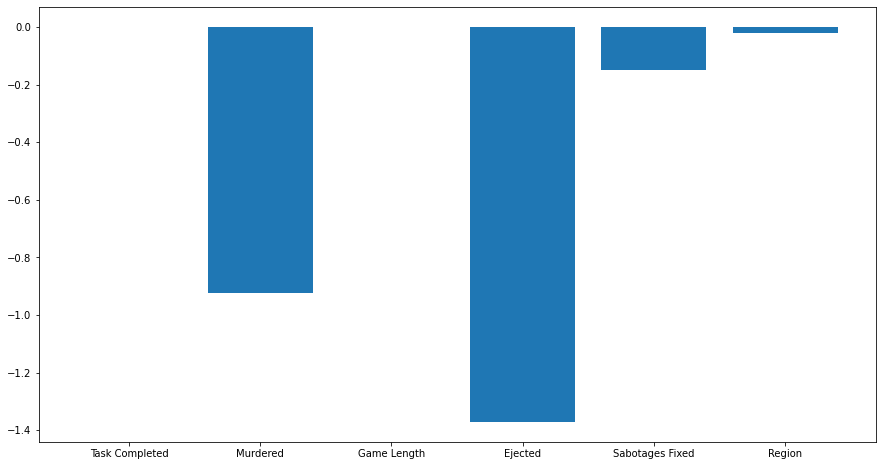

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#train data
X_train = train_data.drop(["Outcome", "Team", "User"], axis=1)
y_train = train_data["Outcome"]
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
coefs = clf.coef_[0]

plt.figure(figsize=(15,8))
plt.bar(X_train.columns, coefs)

In [20]:
# test data
X_test = test_data.drop(["Outcome", "Team", "User"], axis=1)
y_true = test_data["Outcome"]
y_predict = clf.predict(X_test)

auc = roc_auc_score(y_true, y_predict)
print("AUC:", auc)

AUC: 0.6136017272034544


In [22]:
imp['User'].value_counts()

13    29
12    24
9     24
1     23
0     23
2     23
8     21
11    21
26    20
21    20
24    20
7     19
3     19
20    18
17    18
19    16
16    16
6     15
5     14
15    14
25    11
27    10
10     9
18     8
28     7
23     7
22     7
14     6
4      4
Name: User, dtype: int64

 crewmate, grouped by user: avg winrate, avg number of task completed, number of times being crewmate, avg murdered rate, avg ejected rate, avg sabotages fixed, avg game length

In [24]:
users = pd.DataFrame()

users['avg_winrate'] = crewmate.groupby('User')['Outcome'].mean()
users['avg_task_comp'] = crewmate.groupby('User')['Task Completed'].mean()
users['num_time_crew'] = crewmate['User'].value_counts(sort=False)
users['avg_murdered_rate'] = crewmate.groupby('User')['Murdered'].mean()
users['avg_ejected_rate'] = crewmate.groupby('User')['Ejected'].mean()
users['avg_sabotaged_fixed'] = crewmate.groupby('User')['Sabotages Fixed'].mean()
users['avg_game_length'] = crewmate.groupby('User')['Game Length'].mean()

users

,avg_winrate,avg_task_comp,num_time_crew,avg_murdered_rate,avg_ejected_rate,avg_sabotaged_fixed,avg_game_length
User,,,,,,,
0,0.571429,6.142857,77,0.597403,0.012987,0.389610,741.363636
1,0.480519,5.818182,77,0.467532,0.051948,0.675325,636.623377
2,0.485294,5.352941,68,0.426471,0.029412,0.661765,683.514706
3,0.493827,4.135802,81,0.419753,0.061728,0.444444,457.790123
4,0.483871,4.806452,31,0.580645,0.000000,0.451613,708.935484
5,0.593023,5.616279,86,0.534884,0.000000,0.093023,730.790698
6,0.552941,5.505882,85,0.529412,0.000000,0.082353,709.211765
7,0.728395,6.320988,81,0.407407,0.012346,0.456790,765.703704
8,0.556962,6.202532,79,0.544304,0.012658,0.518987,779.924051


In [33]:
imp = df[df['Team']=='Imposter']
imp['Outcome'] = imp['Outcome'].replace(['Loss', 'Win'], [0,1])
imp.head();

<ipython-input-33-5821c3e6795a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp['Outcome'] = imp['Outcome'].replace(['Loss', 'Win'], [0,1])


In [31]:
target = imp.groupby('User')['Outcome'].mean()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(users, 
                                                    target, 
                                                    test_size=0.2,
                                                   random_state=42)

[0.013351083045980108, 0.01816712966506992, 0.020055568714751525, 0.02111504369772632] [0.034129538966013, 0.024198806614650847, 0.0237210801351239, 0.02512092489759861] [-2.4357413003703487, -1.4360375740330014, -1.3879459605592372, -1.5288650766753649]


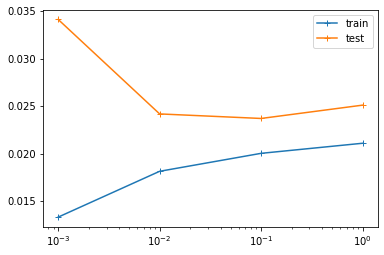

In [45]:
#LASSO
lbds = [1e-3, 1e-2, 1e-1, 1]
train_error_lasso, test_error_lasso = [], []

for lbd in lbds:
    lasso = Lasso(alpha=lbd)
    lasso.fit(X_train, y_train)
    
    pers_train_predict = lasso.predict(X_train)
    pers_test_predict = lasso.predict(X_test)
    train_error_lasso.append(mean_squared_error(y_train, pers_train_predict))
    test_error_lasso.append(mean_squared_error(y_test,pers_test_predict ))

print(train_error_lasso,test_error_lasso)

plt.plot(lbds, train_error_lasso, '-+', label='train')
plt.plot(lbds, test_error_lasso,'-+', label='test')
plt.xscale('log')

plt.legend();

[0.01262669978878741, 0.012626699788787709, 0.012626700083685063, 0.014062169510723983, 0.017047862926834297, 0.01827747483360156, 0.01958643129097493, 0.019990264530667243, 0.02025152153290846] [0.04105780773925553, 0.04105780319849125, 0.04105327125281634, 0.03132902718349165, 0.02545519035774095, 0.024070668624244177, 0.023656652997387576, 0.023640890671047743, 0.02383709743361236]


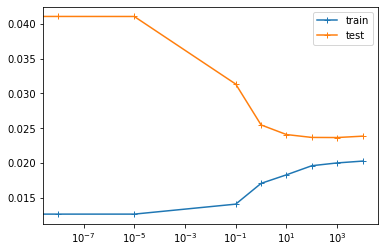

In [50]:
#Ridge
from sklearn.linear_model import Ridge
alphas = [0.0, 1e-8, 1e-5, 0.1, 1, 10, 100, 1000,10000]
train_error, test_error = [], []

for alpha in alphas:
    clf = Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    pers_train_predict = clf.predict(X_train)
    pers_test_predict = clf.predict(X_test)
    train_error.append(mean_squared_error(y_train, pers_train_predict))
    test_error.append(mean_squared_error(y_test,pers_test_predict ))
    
print(train_error,test_error) 

plt.plot(alphas, train_error, '-+', label='train')
plt.plot(alphas, test_error,'-+', label='test')
plt.xscale('log')

plt.legend();